In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fftpack

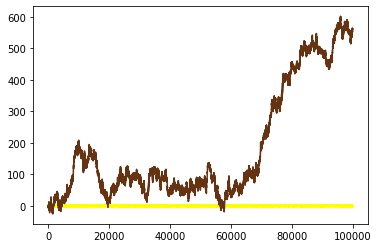

In [ ]:
npnts = int(1e5)

whitenoise = np.random.randn(npnts)
brownnoise = np.cumsum(whitenoise)

# plotting

plt.plot(whitenoise,color = [1,1,0])
plt.plot(brownnoise,color = [.4,.2,.07])
plt.show()


Text(0, 0.5, 'Brown Nouse')

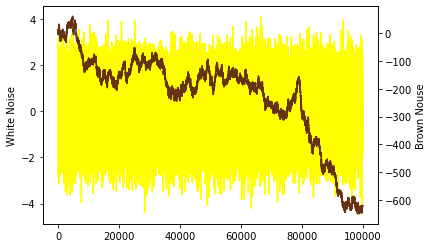

In [ ]:
fig,ax = plt.subplots(1)
ax.plot(whitenoise,color = [1,1,0])
ax2 = ax.twinx()
ax2.plot(brwonnoise, color = [.4,.2,.07])
ax.set_ylabel('White Noise')
ax2.set_ylabel('Brown Noise')

(0.0, 0.03)

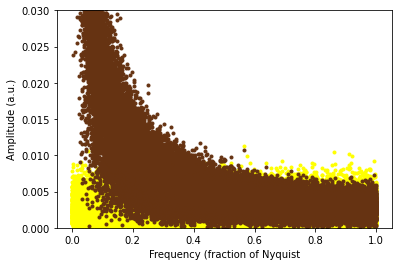

In [ ]:
whitenoiseX = np.abs(fftpack.fft(whitenoise))/npnts
brownnoiseX = np.abs(fftpack.fft(brownnoise))/npnts

# Vector of frequencies

frex = np.linspace(0,1,int(npnts/2)+1)

plt.plot(frex, whitenoiseX[:len(frex)],'.',color = [1,1,0])
plt.plot(frex,brownnoiseX[:len(frex)],'.',color = [.4,.2,.07])
plt.xlabel('Frequency (fraction of Nyquist')
plt.ylabel('Amplitude (a.u.)')
plt.ylim([0,.03])

In [ ]:
# pink noise

fc_amp = 1/(frex+0.1) + np.random.randn(int(npnts/2)+1)**2*5
fc_phs = np.random.randn(int(npnts/2+1))* 2 * np.pi
FourierSpect = np.zeros(npnts,dtype = 'complex')
FourierSpect[:int(npnts/2+1)] = fc_amp * np.exp(1j*fc_phs)

pinknoise = np.real(fftpack.ifft(FourierSpect))

Text(0.5, 1.0, 'Pink Noise freq domain')

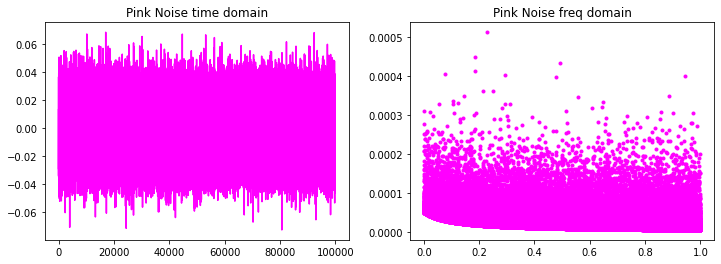

In [ ]:
pinknoiseX = np.abs(fftpack.fft(pinknoise))/npnts

fig, ax = plt.subplots(1,2,figsize = (12,4))
ax[0].plot(pinknoise,color = [1,0,1])
ax[0].set_title('Pink Noise time domain')
ax[1].plot(frex, pinknoiseX[:len(frex)],'.',color = [1,0,1])
ax[1].set_title('Pink Noise freq domain')

In [ ]:
# blue noise

fc_amp = np.linspace(1,3,int(npnts/2)+1) + np.random.randn(int(npnts/2)+1)/5
fc_phs = np.random.randn(int(npnts/2+1))* 2 * np.pi
FourierSpect = np.zeros(npnts,dtype = 'complex')
FourierSpect[:int(npnts/2+1)] = fc_amp * np.exp(1j*fc_phs)

bluenoise = np.real(fftpack.ifft(FourierSpect))

Text(0.5, 1.0, 'Blue Noise freq domain')

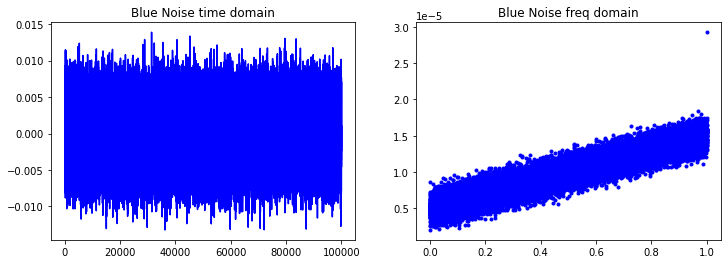

In [ ]:
bluenoiseX = np.abs(fftpack.fft(bluenoise))/npnts

fig, ax = plt.subplots(1,2,figsize = (12,4))
ax[0].plot(bluenoise,color = [0,0,1])
ax[0].set_title('Blue Noise time domain')
ax[1].plot(frex, bluenoiseX[:len(frex)],'.',color = [0,0,1])
ax[1].set_title('Blue Noise freq domain')

In [ ]:
def whiteNoiseSpect(amp):
  noise = amp*np.random.randn(npnts)
  return abs(fftpack.fft(noise)/npnts)

def brownNoiseSpect(amp):
  noise = np.cumsum( amp*np.random.randn(npnts) )
  return abs(fftpack.fft(noise)/npnts)

def pinkNoiseSpect(amp):
  FourierSpect = np.zeros(npnts,dtype=complex)
  fc_amp = 1 / (frex+.01) + np.random.randn(int(npnts/2+1))**2*5
  fc_phs = 2*np.pi * np.random.rand(int(npnts/2+1))
  FourierSpect[:int(npnts/2+1)] = fc_amp * np.exp(1j*fc_phs)
  noise = amp * np.real(fftpack.ifft(FourierSpect))
  return abs(fftpack.fft(noise)/npnts)

def blueNoiseSpect(amp):
  FourierSpect = np.zeros(npnts,dtype=complex)
  fc_amp = np.linspace(1,3,int(npnts/2)+1) + np.random.randn(int(npnts/2+1))/5
  fc_phs = 2*np.pi * np.random.rand(int(npnts/2+1))
  FourierSpect[:int(npnts/2+1)] = fc_amp * np.exp(1j*fc_phs)
  noise = amp * np.real(fftpack.ifft(FourierSpect))
  return abs(fftpack.fft(noise)/npnts)


Text(0.5, 1.0, 'Colorful freq domain plot of noise')

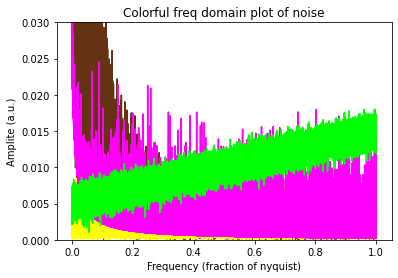

In [ ]:
plt.plot(frex,brownNoiseSpect(1)[:len(frex)],color = [.4,.2,.07])
plt.plot(frex,whiteNoiseSpect(1)[:len(frex)],color = [1,1,0])
plt.plot(frex,pinkNoiseSpect(50)[:len(frex)],color = [1,0,1])
plt.plot(frex,blueNoiseSpect(1000)[:len(frex)],color = [0,1,0])
plt.ylim([0,.03])
plt.xlabel('Frequency (fraction of nyquist)')
plt.ylabel('Amplite (a.u.)')
plt.title('Colorful freq domain plot of noise')

In [ ]:
from IPython.display import Audio

In [1]:
print('White noise')
Audio(brownnoise,rate = 44100)

White noise


NameError: ignored

In [ ]:
print('Brwon noise')
Audio(brownnoise,rate = 44100)